
<div class="alert alert-info" style="background-color:#cce5ff; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px; color:black; text-align:center;font-size:40px;'>Stage 2-B</h2>
    <br>
    <h2 style='margin:10px 5px; color:black; text-align:center;font-size:40px;'>Comments Sentiment Analysis</h2>
</div>

<img src="stageb.png">

<H3>Importing python packages</H3>

In [4]:
#Data processing packages
import pandas as pd
import numpy as np
import os
import json
import string
import nltk
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

# NLP packages
from pycorenlp import StanfordCoreNLP
from textblob import TextBlob
from wordcloud import WordCloud 
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

#Evaluatuin metric
from sklearn.metrics import f1_score, accuracy_score



In [5]:
# define coment dictionaries list
comment_data = []


# define directory path
DIR_PATH = "./Comments/"

In [6]:
# go over all files in the dir
for file_name in os.listdir(DIR_PATH):
    print(file_name)
    # check if the file is a json comment file
    if file_name.endswith('comments.json'):
        # get the entire path of the file
        json_file_path = os.path.join(DIR_PATH, file_name)
        
        # open the json file
        with open (json_file_path, "r") as f:
            
            # load file to dict
            json_data = json.load(f)
        
        # go over the comments 
        for comment in json_data:

            # slice comment meta data
            comment_meta = {
                "comment_id" : comment.get('id'), 
                "comment" : comment.get('commentText'),
                "user_id" : comment.get('author').get('id'),
                "video_id" : file_name[:-14]
            }
            
            # append the data to the final list
            comment_data.append(comment_meta)

Mya3ZvVRTRg-meta.json
zhhxK83hWzU-meta.json
fYMW1l8mBtM-comments.json
E1En24YhQAk-meta.json
RD1RDbZXvjc-meta.json
THS2Wtz7hVI-meta.json
nF4hg6g7SwE-meta.json
Ijl2p72X8dE-meta.json
1lmNy2hZ3hU-meta.json
J_RVM09Lefg-meta.json
QnmpkMz69ZE-meta.json
VZSfPjSSC-c-meta.json
cIfFKPh6Arg-comments.json
RHD4ID_vcrc-meta.json
H5ebd1LxrPM-comments.json
4vaOw5J8A9w-meta.json
b6-qoXEYY10-meta.json
CCnlFUGN7xI-comments.json
xVqYtAcKAYQ-comments.json
6bLG0GcCYik-meta.json
KG9E5LaI8bk-meta.json
KAJ7mpUXcJg-comments.json
kZyhzBsCXUI-comments.json
lvV3jSLYK8A-comments.json
-YFKqKdD3_A-comments.json
Dh6t7ds5yeY-comments.json
qzg9llUcooQ-meta.json
dZ_Ab1XxxKg-comments.json
6l3RGnwYAiU-meta.json
yuNNmf2gIRc-comments.json
UBuVR8_Mybw-meta.json
4OnwUz-I2GI-meta.json
g03AkUkxYCg-comments.json
hIBycJKS2EA-comments.json
nO2mi9s8XnQ-meta.json
ddDvm7C1RMo-meta.json
75NKQ9RxgwE-meta.json
-YYc2J5E9J0-meta.json
l9lql0JnCdM-meta.json
-todavd92_8-meta.json
0Q1TcMgSBQw-meta.json
Y7UXjz0_a9k-meta.json
ptd4JdEU6zc-meta.jso

c5U35BRaKJM-meta.json
F26ThOj7ut4-meta.json
Gsa6JotlOTA-meta.json
xfG15i_uQvc-meta.json
6lCQqpvdgLQ-comments.json
zlIMsqn1etk-meta.json
pBfkVKvQrcU-meta.json
E_2ptII-7DY-meta.json
Hxcfp7_eyjA-meta.json
TK4u6wm-HIk-meta.json
9itC8o6qEYY-meta.json
z8AdxtkkQDo-comments.json
uzOCg72esb4-comments.json
sldeezOwpH4-meta.json
WtgtCjaURdI-meta.json
wovDYB7ooZ8-comments.json
byyBvBQ5CVQ-comments.json
6joCzIxiUaE-meta.json
xSP8u4iiLEg-meta.json
x6Xua49D9eg-meta.json
bAfn2duIlN8-meta.json
WQVRCnLWC1E-meta.json
7kFQH01pvb8-comments.json
sE2Ltzt4z2U-meta.json
F4NsvHNXZBY-comments.json
3J7sLxoNM4w-comments.json
JAGfGvOM07c-meta.json
sr8t1xUqs90-comments.json
PTpoj4f25dk-comments.json
jgLOfZaV3Ac-comments.json
OIzJj8esh3U-meta.json
_tYICvL13N8-meta.json
KnSamHj7F3w-comments.json
jcGg6ebEdxo-comments.json
L_vMQxWkh68-comments.json
Hxcfp7_eyjA-comments.json
eGp3MFdRzes-comments.json
O_7QNdW4yPQ-comments.json
dRtqFjYYUY0-comments.json
ENJwA9MVHz8-comments.json
qtXZlpJP-Ik-comments.json
eFLTXiT5Rso-commen

aC8UPSDFcDk-comments.json
Tqm8Izfn_oU-meta.json
FWJ5aSG6Qi8-comments.json
0a88Y71-m3I-meta.json
esnsi6bmLrU-comments.json
8MkyTIU_ZLk-meta.json
1a8TQZjJ6CA-meta.json
EZVtLzwypdk-meta.json
YRCngWau2GE-comments.json
5T_2yeeMcCs-comments.json
v2-ytP-HllE-meta.json
dqnZteKhbog-meta.json
B--OsMb_S3M-meta.json
36gL4dDHwBM-meta.json
Qnjv3fmi-yg-meta.json
D2kc_LNO7Yw-meta.json
FDASvkMxraA-meta.json
C5SSsle77oY-meta.json
HrV348Q_Org-meta.json
EpxmdsU_N94-meta.json
Mm0NvlXdz4A-comments.json
W15yKKbHE80-comments.json
uY8FNsqcg2c-meta.json
n3mabUQ4sZg-meta.json
rElngrMs2Z4-comments.json
0FdFtL8d6eE-meta.json
Mf6CLoPFcNw-meta.json
WnUqRg3V1Xw-meta.json
bSl9PfRX7WY-meta.json
QrM25jqhXdA-meta.json
_ibTYAxssQw-meta.json
kIGavGZMRqY-meta.json
RoAPTdvgAJg-comments.json
noKpc8fo-R0-comments.json
mOwYlhUbsko-meta.json
1VtCwMvS0s8-meta.json
4I0HSPpIfA0-meta.json
Hew1t8XZbPs-meta.json
L-zeTzLyd6o-comments.json
ktoZIF3AN9E-meta.json
mVV2fF352qk-meta.json
Sye31IVjiss-comments.json
9AxYQOX5_FM-comments.json
E7

pR6rEDFD9UM-meta.json
7gA_PV9lzn0-comments.json
AMLzrGSdCtQ-meta.json
QDD2m9DR4KU-meta.json
xhybjeRciYg-meta.json
pIuSElb3Ous-meta.json
yIYz9HbzsIw-comments.json
4cl1yiusGfE-comments.json
SCJELrxCFrs-comments.json
5ydnDcDrvW8-comments.json
rIjVAdPSOtY-comments.json
RCgPD2sfbAQ-meta.json
VUcUDZzpDw4-comments.json
MQ35l_JDCEU-comments.json
icQMelb7mKY-comments.json
s3QcOSyD38M-comments.json
7MLNGJria1U-meta.json
PBNIFEcGO5k-meta.json
EBLaM5WIuNA-comments.json
jhOsHCGXCGI-meta.json
rGLDGoG0DJU-comments.json
RvfjuYUe6-w-comments.json
JPl73uWN-ao-comments.json
wJkPcqZWYws-comments.json
PAs6yQUCkno-meta.json
7g2q___Kiag-comments.json
zXXxZmwpPnc-comments.json
W2OQctsKXic-comments.json
RQy0NeVnxLo-meta.json
RIv-CrA9PgY-comments.json
mEMxylZFGFE-comments.json
E2FK8gKivu4-meta.json
ooDVCt1ASyQ-comments.json
I49VNQ6lmKk-meta.json
96ZKECaj180-comments.json
fKDuVDZqQ1c-meta.json
gvn06D_s2H0-comments.json
fL30bWrGrfE-meta.json
lF7GLUHu8BE-meta.json
UQaHNS7oCWY-comments.json
h22xb2x0sTc-comments.jso

Ni-n-Q49iGg-comments.json
C3Vnj4R0mcA-meta.json
4VGCbtZ7yPw-meta.json
H4KxxXwKODc-meta.json
wd9-VP2LzM8-meta.json
yXYZQFTs8h0-meta.json
sDgePvjRLNQ-comments.json
g4etDM005wk-meta.json
lzAhPhA3JGE-meta.json
uj12SdVNsPg-meta.json
ertpS3MIwtY-meta.json
tJW0ZYxQqgs-meta.json
61TAqY03xwk-meta.json
TTGaZC1zHVI-meta.json
k0U3AqL4sds-meta.json
H5_tA319-PA-comments.json
it2QQt5pn8Q-comments.json
fwijCB6cH-0-comments.json
ELfBcKl0XBA-meta.json
qWl7vdTFJqM-comments.json
3ZX8graseUQ-meta.json
7wZbsAzNt1o-meta.json
dbWGjcHz9xA-comments.json
YLLX8jeMeqw-comments.json
desL7v-gBUk-comments.json
iDKIw3OgNcg-comments.json
8IJYRbiBfzE-comments.json
E1RSyhastWc-meta.json
Dq3PhCK7cn4-meta.json
sleQkHyZp2E-meta.json
yh0czNNy3Xw-comments.json
li5gN4XElwU-comments.json
NMktYd6wxI4-comments.json
ifI_fwg55k8-meta.json
zneRriyn4FI-meta.json
NnK4K9BmUSI-comments.json
xeR0T_LXGl4-comments.json
Cdbn_pmxFic-meta.json
z6xhM9FzyEA-comments.json
c74d5kqSEvo-comments.json
PD5igzFB8iY-meta.json
sr2fBCzXo4g-comments.json


dAsZVQvjCt8-meta.json
GMfvCpxWsmA-comments.json
JAKBWpiOn0U-comments.json
NlWXEjOOau4-comments.json
ucNTg55Jxe8-comments.json
ZRmRamdNFHg-comments.json
EygudHabVB0-meta.json
qgR9_cjtgtU-comments.json
UK8HH3_q4yI-meta.json
iWKn9cLLMvY-meta.json
cukpXbm1nAs-meta.json
l58W5tmG7Kk-comments.json
OBNkCLRGx2k-comments.json
fJEFIQSdsqw-comments.json
QtxLPB_YGoQ-comments.json
BldsuTqsI1g-meta.json
aZ_0mh9Z4AQ-comments.json
7LB7OA_2dgI-comments.json
-bRb9T5m9VY-meta.json
Vd-SsCiO-g0-meta.json
p0nlU7E_xs8-meta.json
JMW_UNekVyw-meta.json
YLLX8jeMeqw-meta.json
QQX10Nkoj28-comments.json
yiyjcXWZ3Qo-comments.json
-CVqAVX5aAc-meta.json
JeTm5sd8ktg-meta.json
10tXmE1IXw0-comments.json
Peqj69_hZWQ-comments.json
Nt5aIc0Bj2A-comments.json
SS4XLQuKFYg-meta.json
O53SsGavrxE-meta.json
ywABGXXK210-meta.json
SNUlHiPPh3A-comments.json
4f6ti8k_BhY-meta.json
eIe88GuCDfI-meta.json
T4OBgmeJokQ-comments.json
-IqpbDJFbZA-comments.json
sOgvkUwwTa0-meta.json
Bt5NW3ylgkM-meta.json
ziit1JRXpbw-comments.json
nL9Guwuv8HY-co

ueBMbEXp8Y8-comments.json
m5D1-YWqeqo-meta.json
A6ijaVcLWE0-meta.json
W8BfirN9z94-meta.json
K3FGfAQwGPo-meta.json
3Cuaj8FKWfQ-meta.json
WDsua-v1mOY-comments.json
qDCFM_7J75A-meta.json
cFyka8Vp62Y-comments.json
0JnzSowUKAU-comments.json
3GAVVnrF9hU-comments.json
JwX4gQzudYM-comments.json
qfy6Bbro8GI-meta.json
4RI1gWhkgFI-meta.json
s49c2-Qyj8M-comments.json
JnVIHQmCgTk-comments.json
Gf01IzYGQuE-comments.json
mTS7juj9N1E-meta.json
inPgVEy6ojg-comments.json
aLFSuCZpPno-meta.json
aEDJkbSJKP0-meta.json
-lCQMFC2D5Q-meta.json
4yPwXp873JM-comments.json
C7eTtMGz_to-meta.json
ElRn6AX9IBs-meta.json
Z0Fy-LS8QNw-meta.json
k-j-AiMEVZU-meta.json
qDSaOwBHwbs-comments.json
0OYbAWsmYvU-meta.json
z6xhM9FzyEA-meta.json
IRWPL4wRLFE-comments.json
N4zVExS5mgg-meta.json
_zsVSBPPC_c-meta.json
XeXt1T3p8UI-meta.json
pLE796eL090-meta.json
ZlwX_OqZb3Y-comments.json
Mhdad4s9XXU-meta.json
wspZXjeWWq4-comments.json
TtLHiiXyERA-comments.json
MOJ1_FtDGNs-comments.json
xlBmdFORhZ8-meta.json
a96VwQieG18-meta.json
IyQeSdNN

_iM_ND82eL8-meta.json
VSMtrNml9G0-comments.json
1l0aosZHSDA-meta.json
1BnbFK8c_nI-comments.json
ybluwLbwpS0-comments.json
YBkqBMVbtOs-meta.json
ayaxbphDdL4-comments.json
2JfP7FwzJ0Y-meta.json
oXh59L3_eIc-comments.json
82aZZraeSxk-meta.json
FnGlXu94axg-comments.json
hjWvjs2gSd8-meta.json
bm48gAszC1Y-meta.json
t7zDDvbZDOQ-comments.json
yldaHts8rnQ-meta.json
BfhZ7AO0cJA-comments.json
ZM-nBm4CAH4-comments.json
cG8PXdTlDag-comments.json
XSf33i8njNU-meta.json
HFFVIalG_nk-comments.json
hK1gikR0fCg-comments.json
pvg-s-6isdw-comments.json
-gqjCVTXBeM-meta.json
ZF_Kd-rnIkU-comments.json
9I6ww0wrF5g-meta.json
xB6aZxZ8FZw-meta.json
fsGEkCw_B70-comments.json
mIOr6DO2Das-meta.json
eAlCA4OK3Jg-meta.json
v5Ev0t-MXBo-meta.json
tIqlu4sm5OQ-meta.json
zOMGY22XQs8-comments.json
2c_vfYYWG7s-meta.json
RgcpFdRnguk-comments.json
dU1YfSZDClE-meta.json
cqybfPNbWBA-meta.json
RfyXhkhe3J0-comments.json
dR7RxqLA3sM-comments.json
RD1RDbZXvjc-comments.json
2Hqmru-NV30-comments.json
xeUlGnNUut8-comments.json
HUjjOVNCoy

fF2wY4a5sDw-comments.json
2vaVH0SJa3s-meta.json
Nq2Kum-eG8g-meta.json
wq30a6x9wEk-comments.json
71Nx7LkPsnc-comments.json
ZzefeQ0v5wg-comments.json
KYVcJGXAGMk-meta.json
tFsLpLOEUIk-meta.json
CvXRu8SBgPU-comments.json
aYtAdCDOCfU-comments.json
VJI88QIW7H4-meta.json
XGz2zi8K_RA-meta.json
X4WN2vT2rvI-comments.json
sbDjdOadiTE-comments.json
GGXmC3_Gqtw-meta.json
6oLDlqs0cro-meta.json
wKmX8luT7cc-comments.json
zrbACeJ63II-meta.json
N-pdmx_-NdY-meta.json
z4rYAaSwhIE-comments.json
EeAITctSbDg-meta.json
xPQolGgs7KU-meta.json
10tXmE1IXw0-meta.json
vv1W0C920oE-comments.json
LZKmeweVcJ0-comments.json
8bj5U2Yaubs-comments.json
egnUx8QEQnc-comments.json
ZPv25BKcQtU-comments.json
qtXZlpJP-Ik-meta.json
QMafxUi0udE-comments.json
KvNis_A6UaI-meta.json
PNp2IjVv3HI-comments.json
0ql5b39A9DY-comments.json
vpAiZBrzQdM-meta.json
EN7xTbhoEeE-comments.json
9HDKRP4nzc0-meta.json
aqI9iMuN6b4-meta.json
BOtX0HniFRI-comments.json
iw9bRmiWQ6M-meta.json
idEqGGs28uk-comments.json
TR7fP-2qSPg-comments.json
zBWuI9SjOu

aDWgr7YEdTA-meta.json
hFh8nrri0j8-meta.json
vO3isPIaBLM-comments.json
FbyK6CBQWPk-meta.json
zBDc5aUdj0Y-meta.json
Qnjv3fmi-yg-comments.json
1CEDr7VvNaw-comments.json
LCwMSYf2c7I-comments.json
dZ_Ab1XxxKg-meta.json
ldS_yHnZMDs-meta.json
FEkYd1qF5Ko-meta.json
PAs6yQUCkno-comments.json
9_FaQXC1M-0-comments.json
Q7HyukQ-mGw-comments.json
CAZ0aH-hiUU-comments.json
5krV47BLyoQ-meta.json
UEDLieBoTsI-meta.json
vcaXm9dgcpI-comments.json
M2VvFXCR3II-comments.json
WsT4lfL0ud4-meta.json
v8WRJSBi6E4-meta.json
1paoVfC6b1s-meta.json
4Hg-FFKqN1c-meta.json
Wr1zyTNTLtQ-comments.json
KhvIFWz1W9k-comments.json
dRm8g7Y0plM-comments.json
KkoUMZpIQvw-comments.json
zgTAWbH7fNY-comments.json
M-NRyniYjeE-comments.json
xpG0Vp4y8xo-meta.json
h-m1WcEUT0E-meta.json
LRSwJo6fXOo-comments.json
H-4Lx-h73_c-meta.json
0we7kcmgDOw-meta.json
2e9AAWme1q8-comments.json
I6IQ2VZHRVE-meta.json
25KWpk8TC5Q-comments.json
5nUUFHH5PMA-comments.json
WFF0hvpfkWE-meta.json
saoiKoNvnn8-comments.json
tTxhneVcmEo-comments.json
L0maUNPheM

KeyboardInterrupt: 

In [ ]:
comment_data

In [5]:
# create the dataframe 
comments_df = pd.DataFrame(comment_data)
comment_textblob = pd.DataFrame(comment_data)
comment_stanfordnlp = pd.DataFrame(comment_data)

In [6]:
# get number of rows
comments_df.shape

(1022907, 4)

In [7]:
# check for nulls
comments_df.isnull().any()

comment_id    False
comment       False
user_id       False
video_id      False
dtype: bool

<hr>

<h1> Testing Sentiment Analysis </h1>

<ol>
    <li><h3>Textblob</h3></li>
    <li><h3>StanfordCoreNLP</h3></li>
       </ol>
  


<h2>1. Textblob </h2>
<h3>Calculating Sentiment polarity for each comment using Textblob</h3>

In [85]:
comment_textblob = comment_textblob.head(299)

In [86]:
comment_textblob

,comment_id,comment,user_id,video_id
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU
...,...,...,...,...
294,Ugy7AHOgz8RsZGaDlPF4AaABAg,please do review on Asus TUF series,UCHvXh-IUnuMpW9In1QDtJwA,pdUKug8XahU
295,UgxHeoZD1jzaFzRk1514AaABAg,"0,75x amazing",UCDVkpweDf2rzpe0VkwXkbzw,pdUKug8XahU
296,Ugw8v2BuuHKv_UAYY294AaABAg,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU
297,UgyBJOZR0sGfGVh1aT54AaABAg,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU


In [87]:
def sentiment_calc(text):
    """
    Calculating the Sentiment Polarity
    if the text cannot be processed by TextBlob (not string format)
    then return None 
    else compute the polarity
    """
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

In [88]:
# get the sentiment of the comments
comment_textblob['sentiment'] = comment_textblob['comment'].progress_apply(lambda x: sentiment_calc(x))


In [89]:
comment_textblob

,comment_id,comment,user_id,video_id,sentiment
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU,0.500000
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU,0.412500
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU,0.150000
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU,0.223810
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU,0.000000
...,...,...,...,...,...
294,Ugy7AHOgz8RsZGaDlPF4AaABAg,please do review on Asus TUF series,UCHvXh-IUnuMpW9In1QDtJwA,pdUKug8XahU,0.000000
295,UgxHeoZD1jzaFzRk1514AaABAg,"0,75x amazing",UCDVkpweDf2rzpe0VkwXkbzw,pdUKug8XahU,0.600000
296,Ugw8v2BuuHKv_UAYY294AaABAg,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,-0.181818
297,UgyBJOZR0sGfGVh1aT54AaABAg,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,0.266667


In [90]:
def plot_words(all_words):

    # plot the most frequent words
    wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_posi, interpolation="bilinear")
    plt.axis('off')
    plt.show()

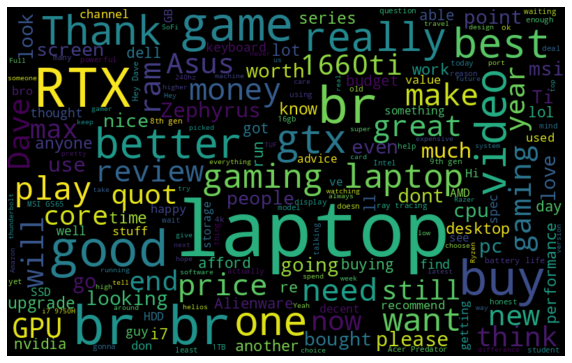

In [91]:
#Displaying the POSITIVE comments
all_words_posi = ' '.join([text for text in comment_textblob['comment'][comment_textblob.sentiment > 0]])
plot_words(all_words_posi)

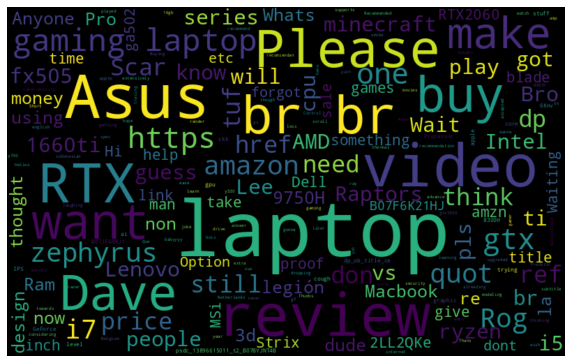

In [92]:
#Displaying the nuetral comments
all_words_nuet = ' '.join([text for text in comment_textblob['comment'][comment_textblob.sentiment == 0]])
plot_words(all_words_nuet)

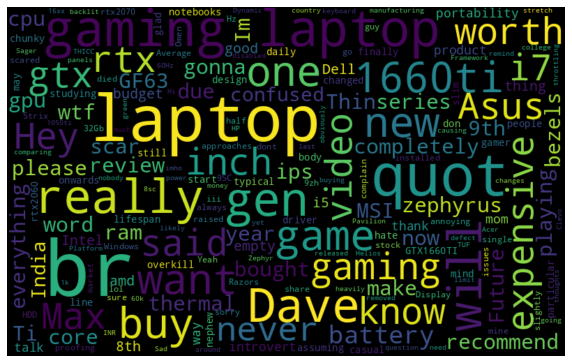

In [93]:
#Displaying the negative comments
all_words_neg = ' '.join([text for text in comment_textblob['comment'][comment_textblob.sentiment < 0]])
plot_words(all_words_neg)

In [94]:
comment_textblob

,comment_id,comment,user_id,video_id,sentiment
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU,0.500000
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU,0.412500
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU,0.150000
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU,0.223810
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU,0.000000
...,...,...,...,...,...
294,Ugy7AHOgz8RsZGaDlPF4AaABAg,please do review on Asus TUF series,UCHvXh-IUnuMpW9In1QDtJwA,pdUKug8XahU,0.000000
295,UgxHeoZD1jzaFzRk1514AaABAg,"0,75x amazing",UCDVkpweDf2rzpe0VkwXkbzw,pdUKug8XahU,0.600000
296,Ugw8v2BuuHKv_UAYY294AaABAg,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,-0.181818
297,UgyBJOZR0sGfGVh1aT54AaABAg,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,0.266667


In [95]:
#Textblob
# get the percantage of the positive comments
print("Positive Percentage",comment_textblob[comment_textblob['sentiment'] > 0].shape[0]/comment_textblob.shape[0])

# get the percantage of the nuetral confidence comments
print("Nuetral Percentage",comment_textblob[comment_textblob['sentiment'] == 0].shape[0]/comment_textblob.shape[0])

# get the percantage of the negative comments
print("Negative Percentage",comment_textblob[comment_textblob['sentiment'] < 0].shape[0]/comment_textblob.shape[0])



Positive Percentage 0.5752508361204013
Nuetral Percentage 0.3177257525083612
Negative Percentage 0.10702341137123746


# Evaluation

In [28]:
def accuracy( df) :
        "Prediction accuracy (percentage) and F1 score"
        acc = accuracy_score(df['truth'], df['pred'])*100
        f1 = f1_score(df['truth'], df['pred'], average='macro')
        print("Accuracy: {}\nMacro F1-score: {}".format(acc,f1))


In [97]:
comment_textblob = comment_textblob.rename(columns={'sentiment': 'pred'})

In [98]:
for i in range (0,149):
    if comment_textblob['pred'].loc[i] < -0.4 : 
        comment_textblob['pred'].loc[i] = 0
        
    if comment_textblob['pred'].loc[i] < 0 and comment_textblob['pred'].loc[i] > -0.4  : 
        comment_textblob['pred'].loc[i] = 1
      
    if comment_textblob['pred'].loc[i] == 0 : 
        comment_textblob['pred'].loc[i] = 2
      
    if comment_textblob['pred'].loc[i] < 0.6 and comment_textblob['pred'].loc[i] > 0  : 
        comment_textblob['pred'].loc[i] = 3
      
    if comment_textblob['pred'].loc[i] < 1.1 and comment_textblob['pred'].loc[i] > 0.6  : 
        comment_textblob['pred'].loc[i] = 4
      

In [99]:
comment_textblob['pred'] = comment_textblob['pred'].astype('int')

In [100]:
txtblob_truth = pd.read_csv("COMMENTS.csv")

In [101]:
txtblob_truth

,comment_id,comment,user_id,video_id,sentiment
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU,1
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU,1
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU,2
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU,2
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU,2
...,...,...,...,...,...
294,UgxHeoZD1jzaFzRk1514AaABAg,"0,75x amazing",UCDVkpweDf2rzpe0VkwXkbzw,pdUKug8XahU,4
295,Ugw8v2BuuHKv_UAYY294AaABAg,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,0
296,UgyBJOZR0sGfGVh1aT54AaABAg,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,4
297,UgxkxzqWmY5BXj_0UXt4AaABAg,And here I am playing fortnite using Intel 4000 gpu,UC0Di0AQiGoMWEaqPN0KUYvQ,pdUKug8XahU,2


In [102]:
#predition 
comment_textblob['truth'] = txtblob_truth['sentiment'].copy()

In [103]:
accuracy(comment_textblob)

Accuracy: 15.719063545150503
Macro F1-score: 0.12401121146060416


<h2>2. StanfordCoreNLP </h2>
<h3>Calculating Sentiment polarity for each comment using StanfordCoreNLP</h3>

In [8]:
comment_stanfordnlp= comment_stanfordnlp.head(299)

<h6>Here, we will delete dots from the paragraph that contains more than one sentence to avoid calculating the sentiment for each sentence separately

In [9]:
# remove dots  
comment_stanfordnlp['new_comment'] = comment_stanfordnlp['comment'].apply(lambda x : x.replace("."," "))

In [10]:
comment_stanfordnlp.head()

,comment_id,comment,user_id,video_id,new_comment
0,Ugxbw2WD-hchkWCrmt54AaABAg,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops,UCIF8DkwMeRUtWq9wSvMqBgw,pdUKug8XahU,I&#39;m watching this in 2021 cause I can&#39;t afford the latest laptops
1,Ugzy0AbwK8hjbnvV-5Z4AaABAg,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...,UC2JijchTVFQdbrhIT8njcMg,pdUKug8XahU,I am still using my alienware 15 R3 laptop with a gtx1070 and an intel I7 7thgen and it still holds up today but with some games that Nvidia thinks it can run at max settings it can&#39;t when th...
2,UgyY3jPwgpT1oGi7kvJ4AaABAg,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years,UC8sm6uSupqoaPPy4b_JD3IQ,pdUKug8XahU,1 year later is rtx 2060 worth buying now? Considering that i will try to push the life of my laptop for 6+ years
3,UgxhZOz5QLpGsDOWiip4AaABAg,"RT dont interst me. Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance. I end up with triton 500 i7 107...",UCyXZpHjDZwnSMML1E8PtZyw,pdUKug8XahU,"RT dont interst me Dlss is good stuff and main reason i got rtx 2070super is i wanted my laptop have similar pref as my ryzen 1600, gtx 1080 16 gb pc preformance I end up with triton 500 i7 107..."
4,UgxX5Uwv-ue48davJCR4AaABAg,still in 2020?,UCsBUE8WUKtIdAyWPk5AzPJQ,pdUKug8XahU,still in 2020?


In [11]:
comment_stanfordnlp = comment_stanfordnlp[comment_stanfordnlp.new_comment != ""] 

In [12]:
def get_sentiment(row):
    
    """
    get_sentiment func 
    input : row from data frame 
    output : sentiment value for the comment in the row
    """
    
    nlp = StanfordCoreNLP('http://localhost:9000')
    res = nlp.annotate(
        row,
        properties={
            "annotators": "sentiment",
            "outputFormat": "json",
            "timeout": 100,
        },
    )   
    
    try:
        return res["sentences"][0]["sentimentValue"]
    except:
        return None  

In [13]:
# compute sentiment value for each comment using StanfordCoreNLP
comment_stanfordnlp['sentiment'] = comment_stanfordnlp['new_comment'].progress_apply(lambda x: get_sentiment(x))

In [14]:
comment_stanfordnlp['sentiment'].dtypes
comment_stanfordnlp['sentiment'] = pd.to_numeric(comment_stanfordnlp['sentiment'], errors='coerce')

In [15]:
comment_stanfordnlp.dropna()

,comment_id,comment,user_id,video_id,new_comment,sentiment
9,UgytZ2teABnWW8WiFMZ4AaABAg,Hey so what the typical lifespan of a gaming laptop as a casual gamer?,UCtkn6SumRP4DiD16HYRZQWw,pdUKug8XahU,Hey so what the typical lifespan of a gaming laptop as a casual gamer?,1.0
13,UgyLydqV07BdkUEuOiF4AaABAg,"I subscribe u, because u r too honest to ignore",UCD00GZXEB5iJPZjFDgQSoMg,pdUKug8XahU,"I subscribe u, because u r too honest to ignore",1.0
14,UgxxKfd8I9Y135Y9VAF4AaABAg,I don&#39;t know wtf people gonna do with rtx2060 it&#39;s completely overkill,UCumn0__vTbOagUdZbTyxXEg,pdUKug8XahU,I don&#39;t know wtf people gonna do with rtx2060 it&#39;s completely overkill,1.0
15,UgzROtJy0mQY_QfQahh4AaABAg,This may be an unusual question. <br /><br />Which one of these laptops would be good for running Left 4 Dead 2 and Happy Wheels? I love those games.,UCLHUTQesKuVQqBHj3zN_Zeg,pdUKug8XahU,This may be an unusual question <br /><br />Which one of these laptops would be good for running Left 4 Dead 2 and Happy Wheels? I love those games,2.0
16,UgxJgXknAoNI8kQ7TER4AaABAg,which is the best gaming laptop under $1500 in 2019?,UCnmHfkkoz637Fjg_dDQeWAw,pdUKug8XahU,which is the best gaming laptop under $1500 in 2019?,2.0
...,...,...,...,...,...,...
294,Ugy7AHOgz8RsZGaDlPF4AaABAg,please do review on Asus TUF series,UCHvXh-IUnuMpW9In1QDtJwA,pdUKug8XahU,please do review on Asus TUF series,2.0
295,UgxHeoZD1jzaFzRk1514AaABAg,"0,75x amazing",UCDVkpweDf2rzpe0VkwXkbzw,pdUKug8XahU,"0,75x amazing",3.0
296,Ugw8v2BuuHKv_UAYY294AaABAg,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",1.0
297,UgyBJOZR0sGfGVh1aT54AaABAg,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",3.0


In [16]:
# Stanford corenlp
# get the percantage of the positive comments
print(comment_stanfordnlp[comment_stanfordnlp['sentiment'] > 2].shape[0]/comment_stanfordnlp.shape[0])

# get the percantage of the nuetral confidence comments
print(comment_stanfordnlp[comment_stanfordnlp['sentiment'] == 2].shape[0]/comment_stanfordnlp.shape[0])

# get the percantage of the negative comments
print(comment_stanfordnlp[comment_stanfordnlp['sentiment'] < 2].shape[0]/comment_stanfordnlp.shape[0])



0.19732441471571907
0.43812709030100333
0.1705685618729097


In [17]:
comment_stanfordnlp = comment_stanfordnlp.dropna(how='any',axis=0) 

# Evaluation

In [19]:
stnnlp_truth = pd.read_csv("COMMENTS.csv")

In [22]:
#predition 
comment_stanfordnlp['truth'] = stnnlp_truth['sentiment'].copy()


In [23]:
comment_stanfordnlp

,comment_id,comment,user_id,video_id,new_comment,sentiment,truth
9,UgytZ2teABnWW8WiFMZ4AaABAg,Hey so what the typical lifespan of a gaming laptop as a casual gamer?,UCtkn6SumRP4DiD16HYRZQWw,pdUKug8XahU,Hey so what the typical lifespan of a gaming laptop as a casual gamer?,1.0,2
13,UgyLydqV07BdkUEuOiF4AaABAg,"I subscribe u, because u r too honest to ignore",UCD00GZXEB5iJPZjFDgQSoMg,pdUKug8XahU,"I subscribe u, because u r too honest to ignore",1.0,4
14,UgxxKfd8I9Y135Y9VAF4AaABAg,I don&#39;t know wtf people gonna do with rtx2060 it&#39;s completely overkill,UCumn0__vTbOagUdZbTyxXEg,pdUKug8XahU,I don&#39;t know wtf people gonna do with rtx2060 it&#39;s completely overkill,1.0,2
15,UgzROtJy0mQY_QfQahh4AaABAg,This may be an unusual question. <br /><br />Which one of these laptops would be good for running Left 4 Dead 2 and Happy Wheels? I love those games.,UCLHUTQesKuVQqBHj3zN_Zeg,pdUKug8XahU,This may be an unusual question <br /><br />Which one of these laptops would be good for running Left 4 Dead 2 and Happy Wheels? I love those games,2.0,2
16,UgxJgXknAoNI8kQ7TER4AaABAg,which is the best gaming laptop under $1500 in 2019?,UCnmHfkkoz637Fjg_dDQeWAw,pdUKug8XahU,which is the best gaming laptop under $1500 in 2019?,2.0,2
...,...,...,...,...,...,...,...
294,Ugy7AHOgz8RsZGaDlPF4AaABAg,please do review on Asus TUF series,UCHvXh-IUnuMpW9In1QDtJwA,pdUKug8XahU,please do review on Asus TUF series,2.0,4
295,UgxHeoZD1jzaFzRk1514AaABAg,"0,75x amazing",UCDVkpweDf2rzpe0VkwXkbzw,pdUKug8XahU,"0,75x amazing",3.0,0
296,Ugw8v2BuuHKv_UAYY294AaABAg,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",1.0,4
297,UgyBJOZR0sGfGVh1aT54AaABAg,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",3.0,2


In [31]:
comment_stanfordnlp = comment_stanfordnlp.rename(columns={'sentiment': 'pred'})

In [32]:
comment_stanfordnlp

,comment_id,comment,user_id,video_id,new_comment,pred,truth
9,UgytZ2teABnWW8WiFMZ4AaABAg,Hey so what the typical lifespan of a gaming laptop as a casual gamer?,UCtkn6SumRP4DiD16HYRZQWw,pdUKug8XahU,Hey so what the typical lifespan of a gaming laptop as a casual gamer?,1.0,2
13,UgyLydqV07BdkUEuOiF4AaABAg,"I subscribe u, because u r too honest to ignore",UCD00GZXEB5iJPZjFDgQSoMg,pdUKug8XahU,"I subscribe u, because u r too honest to ignore",1.0,4
14,UgxxKfd8I9Y135Y9VAF4AaABAg,I don&#39;t know wtf people gonna do with rtx2060 it&#39;s completely overkill,UCumn0__vTbOagUdZbTyxXEg,pdUKug8XahU,I don&#39;t know wtf people gonna do with rtx2060 it&#39;s completely overkill,1.0,2
15,UgzROtJy0mQY_QfQahh4AaABAg,This may be an unusual question. <br /><br />Which one of these laptops would be good for running Left 4 Dead 2 and Happy Wheels? I love those games.,UCLHUTQesKuVQqBHj3zN_Zeg,pdUKug8XahU,This may be an unusual question <br /><br />Which one of these laptops would be good for running Left 4 Dead 2 and Happy Wheels? I love those games,2.0,2
16,UgxJgXknAoNI8kQ7TER4AaABAg,which is the best gaming laptop under $1500 in 2019?,UCnmHfkkoz637Fjg_dDQeWAw,pdUKug8XahU,which is the best gaming laptop under $1500 in 2019?,2.0,2
...,...,...,...,...,...,...,...
294,Ugy7AHOgz8RsZGaDlPF4AaABAg,please do review on Asus TUF series,UCHvXh-IUnuMpW9In1QDtJwA,pdUKug8XahU,please do review on Asus TUF series,2.0,4
295,UgxHeoZD1jzaFzRk1514AaABAg,"0,75x amazing",UCDVkpweDf2rzpe0VkwXkbzw,pdUKug8XahU,"0,75x amazing",3.0,0
296,Ugw8v2BuuHKv_UAYY294AaABAg,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,"And intel, what the hell, why is the new I7-9750H not 8 core? WTF?",1.0,4
297,UgyBJOZR0sGfGVh1aT54AaABAg,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",UCx2WxjQFGpd2rywrVVhYglg,pdUKug8XahU,"My GTX 1080 OC beats the shit out of RTX 2080 MQ, only 200 watt RTX 2080 can beat my awesome MXM GPU!",3.0,2


In [33]:
accuracy(comment_stanfordnlp)

Accuracy: 36.09958506224066
Macro F1-score: 0.20428359005642824


<hr>
<h3>The below table shows the percentages for positive/negative/neutral when using textblob and Stanford corenlp
<br>
<br>
<table style="width:80%">
  <tr>
    <th>Library Type</th>
    <th>Accuracy</th>
    <th>Macro F1-score</th>
  </tr>
  <tr>
    <td>Textblob</td>
    <td>15.7190635451505</td>
    <td> 0.1240112114606</td>
  </tr>
  <tr>
    <td>Stanford Corenlp</td>
    <td>36.09958506224066</td>
    <td>0.204283590</td>
  </tr>
</table>

<hr>
<h3>The below table shows the percentages for positive/negative/neutral when using textblob and Stanford corenlp
<br>
<br>
<table style="width:80%">
  <tr>
    <th>Library Type</th>
    <th>Positive</th>
    <th>Neutral</th>
    <th>Negative</th>
  </tr>
  <tr>
    <td>Textblob</td>
    <td>0.57</td>
    <td>0.31</td>
    <td>0.10</td>
  </tr>
  <tr>
    <td>Stanford Corenlp</td>
    <td>0.19</td>
    <td>0.43</td>
    <td>0.17</td>
  </tr>
</table>